<a href="https://colab.research.google.com/github/d-egan/cs7gv1_Assignment-1/blob/main/CS7GV1_Assignment_1_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Messing with Mean Shift

The plan was to implement some mean shift filtering and maybe segmentation but I ran out of time.

While looking for some example implementations or a place to start I found [this paper](https://www.ipol.im/pub/art/2019/255/article_lr.pdf) titled "An Implementation of the Mean Shift Algorithm". So to get going I translated their implementation from the accompanying C++ into python. Unfortuanately it's a extremely straightforward, slow, naive implementation with no tricks. I'm not great with algorithms but I found 1 divide by zero bug and unless I'm really misunderstanding how it works, I don't think it actually implements the mean shift.

In [260]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [261]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
if RunningInCOLAB:
  from google.colab.patches import cv2_imshow
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

In [263]:
def imshow(img):
  if RunningInCOLAB:
    cv2_imshow(img)
  else:
    cv2.imshow(img)

In [264]:
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/images/england-3735180_640.jpg')
#myimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [265]:
img_small = img[:100, :100, :]

<function matplotlib.pyplot.show>

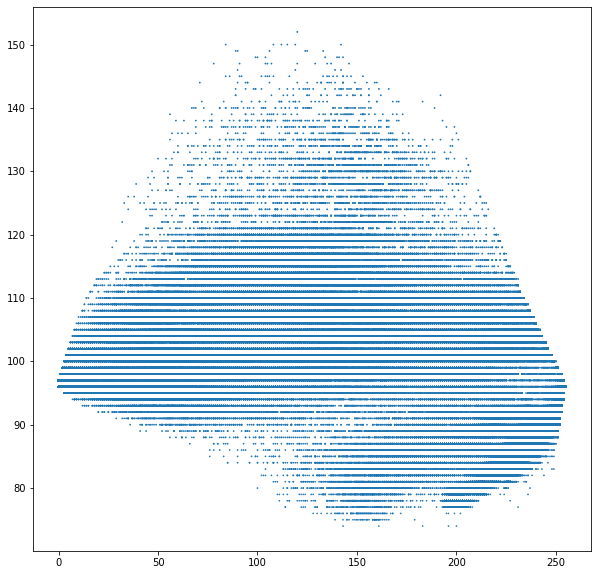

In [266]:
plt.figure(figsize=(10,10)) 
plt.scatter(Luv[:,:,0], Luv[:,:,1], s=(Luv[:,:,2]/255))
plt.show

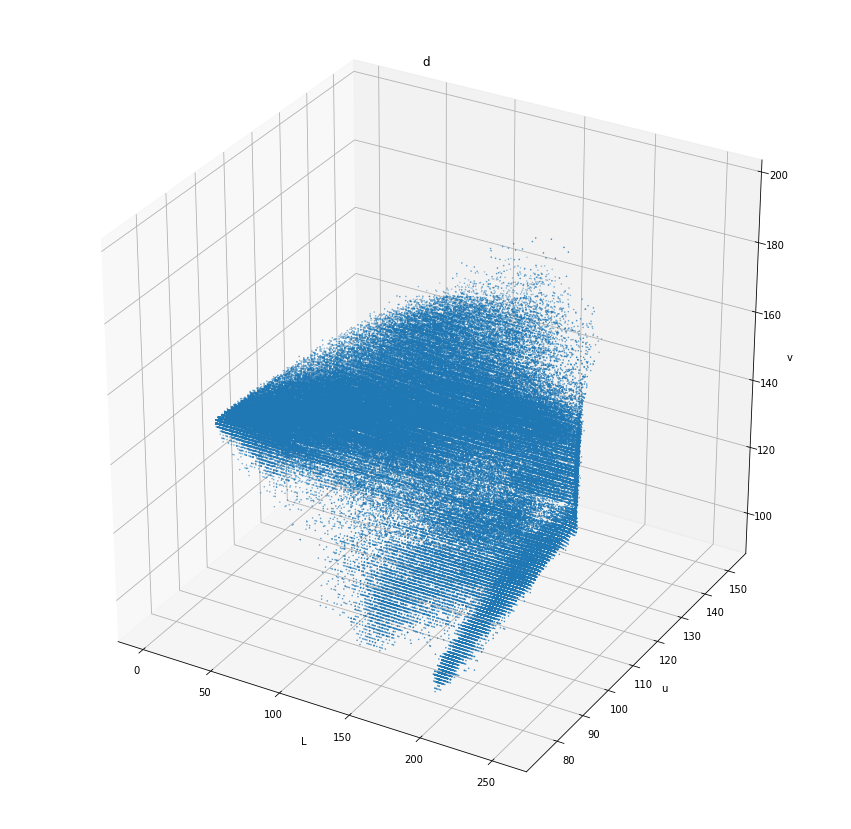

In [267]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Luv[:,:,0], Luv[:,:,1], Luv[:,:,2], s=0.3)
plt.title(f'd')
ax.set_xlabel("L")
ax.set_ylabel("u")
ax.set_zlabel("v")
plt.show()

In [268]:
# Super naive implementation
def mean_shift_filter(img, s_radius, c_radius):
  radius = 5
  spatial_radius = s_radius
  color_radius = c_radius**2
  Luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
  height, width, d = Luv.shape
  #Luv = Luv * 1.0/255.0
  for y in range(0, height):
    for x in range(0, width):
      xc = x
      yc = y
      l, u, v = Luv[y, x]
      mean_shift = 5
      max_iters = 50
      iters = 0

      while (mean_shift > 1 and iters < max_iters):
        mi = 0.0
        mj = 0.0
        ml = 0.0
        mu = 0.0
        mv = 0.0
        num = 0

        # Create window ranges
        xfrom = max(0, x - spatial_radius)
        xto = min(width, x + spatial_radius + 1)
        yfrom = max(0, y - spatial_radius)
        yto = min(height, y + spatial_radius + 1)

        for j in range(yfrom, yto):
          for i in range(xfrom, xto):
            #print(f'x {x} y {y} i {i} j {j}')
            l2, u2, v2 = Luv[j, i]
            ldif = l2 - l
            udif = u2 - u
            vdif = v2 - v

            #print(ldif**2 + udif**2 + vdif**2)
            if (ldif**2 + udif**2 + vdif**2 <= color_radius):
              mi += i
              mj += j
              ml += l2
              mu += u2
              mv += v2
              num += 1
        
        xcold = xc
        ycold = yc
        lold = l
        uold = u
        vold = v
        if num == 0:
          break
        
        num = 1.0/num
        #print(f'l {l} ml {ml}')
        l = ml * num
        #print(l)
        u = mu * num
        v = mu * num
        xc = int(mi * num + 0.5)
        #print(f'xc {xc} ----------------------')
        yc = int(mj * num + 0.5)
        #if (xc < x or xc < y):
        #  break
        xdif = xc - xcold
        ydif = yc - ycold
        ldif = l - lold
        udif = u - uold
        vdif = v - vold

        mean_shift = xdif**2 + ydif**2 + ldif**2 + udif**2 + vdif**2
        #print(mean_shift)
        iters += 1
      
      #print(Luv[y, x])
      #print(x, y)
      #print(f'l {l} u {u} v {v}')
      Luv[y, x, :] = (l, u, v)
      #print(Luv[y,x])
    
    #return (Luv * 255.0).astype('uint8')
    print(y)
  return Luv

In [269]:

luv = mean_shift_filter(img_small, 20, 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in ubyte_scalars


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


It is at least filtered.

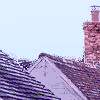

In [270]:
bgr = cv2.cvtColor(luv, cv2.COLOR_Luv2BGR)
imshow(bgr)

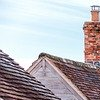

In [271]:
imshow(img_small)